# "Quick look" plots (LZIFU)
---
Use `spaxelsleuth` to make nice summary plots for a given galaxy. 

In [1]:
from spaxelsleuth import load_user_config
load_user_config("/home/u5708159/.spaxelsleuthconfig.json")

In [2]:
# Imports
from spaxelsleuth.loaddata.lzifu import load_lzifu_df
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 12})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


utils.py (148) _init_num_threads(): INFO: Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils.py (160) _init_num_threads(): INFO: NumExpr defaulting to 8 threads.


In [3]:
# Options
savefigs = True
bin_type = "default"    
ncomponents = "1"   
eline_SNR_min = 3       

In [5]:
# Load the SAMI sample
df = load_lzifu_df(ncomponents=ncomponents,
                  eline_SNR_min=eline_SNR_min,
                  correct_extinction=False)

lzifu.py (687) load_lzifu_df(): INFO: loading DataFrame from file /priv/meggs3/u5708159/LZIFU/spaxelsleuth/lzifu_1-comp_minSNR=3.hd5 [last modified 2023-08-25 16:00:43.921857]...
lzifu.py (706) load_lzifu_df(): INFO: finished!


In [6]:
# Select a galaxy
gal = df["ID"].unique()[0]

plot2dmap.py (198) plot2dmap(): WARNING: 'bin_type' not specified - assuming 'default'
plot2dmap.py (224) plot2dmap(): WARNING: x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data
plot2dmap.py (198) plot2dmap(): WARNING: 'bin_type' not specified - assuming 'default'
plot2dmap.py (224) plot2dmap(): WARNING: x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data
plot2dmap.py (198) plot2dmap(): WARNING: 'bin_type' not specified - assuming 'default'
plot2dmap.py (224) plot2dmap(): WARNING: x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data
plot2dmap.py (198) plot2dmap(): WARNING: 'bin_type' not specified - assuming 'default'
plot2dmap.py (224) plot2dmap(): WARNING: x0_px and y0_px were not found in the DataFrame so I am assuming their values from the shape of the data
plot2dmap.py (198) plot2dmap(): WARNING: 'bin_type' not specified - 

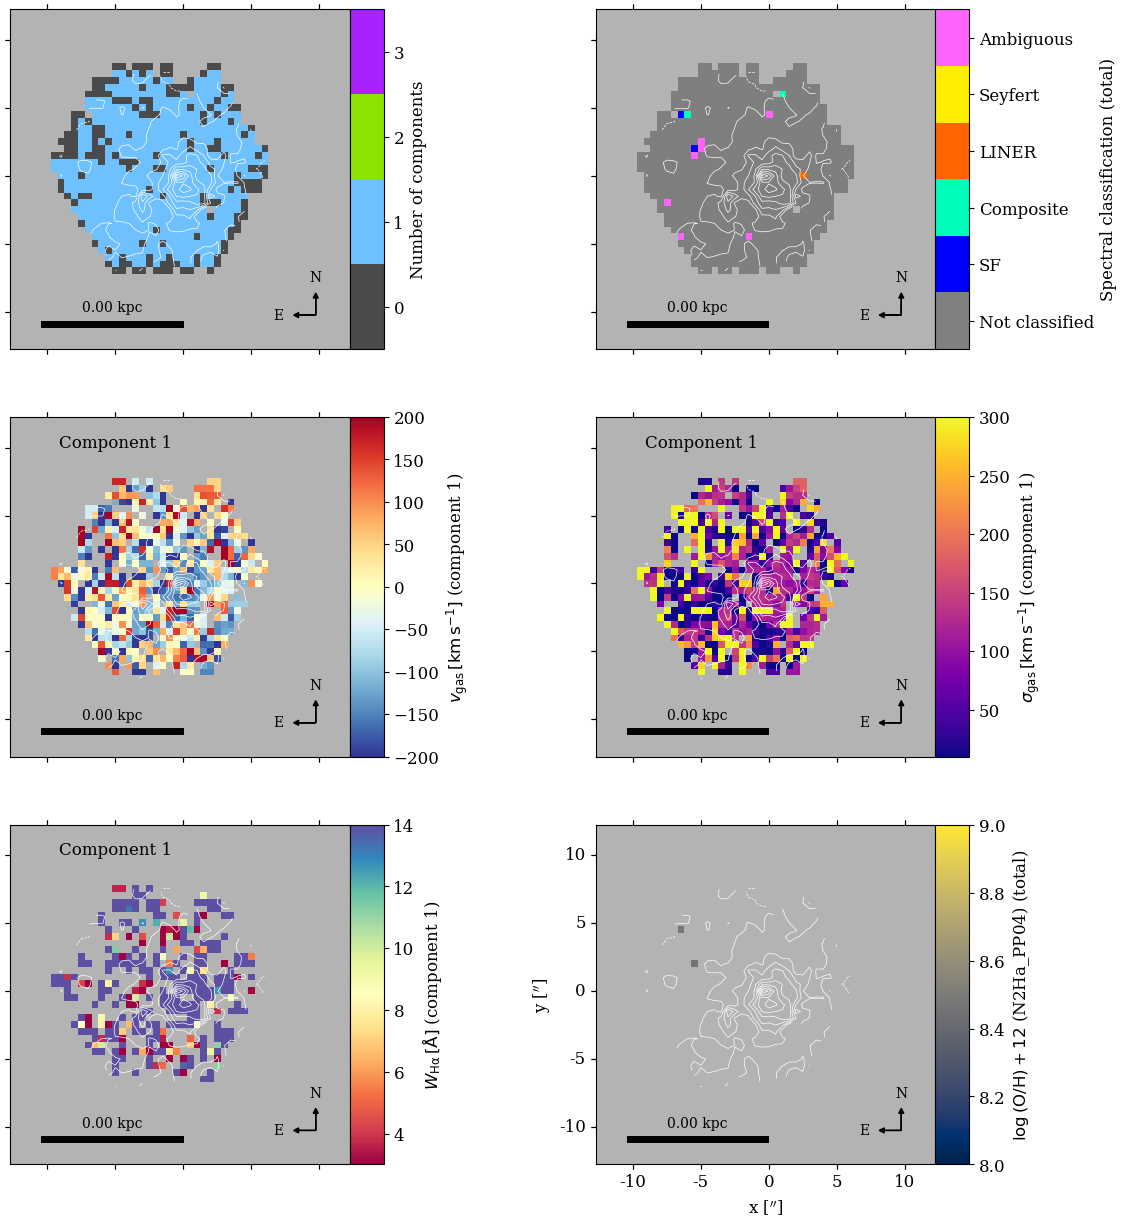

In [8]:
# Create a collage figure displaying various quantities of interest for 
# this galaxy
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
fig.subplots_adjust(wspace=0.7, hspace=0.2)
ii = 0

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Number of components
_, ax = plot2dmap(df=df, gal=gal,
          col_z="Number of components",
          ax=axs.flat[ii],
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)
ii += 1

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# BPT classifications 
_, ax = plot2dmap(df=df, gal=gal,
          col_z="BPT (numeric) (total)",
          ax=axs.flat[ii],
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)
ii += 1

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# v_gas
_, ax = plot2dmap(df=df, gal=gal,
            col_z=f"v_gas (component 1)",
            ax=axs.flat[ii],
            plot_colorbar=True, cax=None, cax_orientation="vertical", 
            vmin=-200, vmax=+200,
            show_title=False)
ax.text(s=f"Component 1", x=0.15, y=0.95, transform=axs.flat[ii].transAxes, verticalalignment="top")
lat = ax.coords[1]
lat.set_ticklabel_visible(False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
ii += 1

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# sigma_gas
_, ax = plot2dmap(df=df, gal=gal,
            col_z=f"sigma_gas (component 1)",
            ax=axs.flat[ii],
            plot_colorbar=True, cax=None, cax_orientation="vertical", 
            vmin=10, vmax=300,
            show_title=False)
ax.text(s=f"Component 1", x=0.15, y=0.95, transform=axs.flat[ii].transAxes, verticalalignment="top")
lat = ax.coords[1]
lat.set_ticklabel_visible(False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
ii += 1

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# EW 
_, ax = plot2dmap(df=df, gal=gal,
            col_z=f"HALPHA EW (component 1)",
            ax=axs.flat[ii],
            plot_colorbar=True, cax=None, cax_orientation="vertical", 
            show_title=False)
ax.text(s=f"Component 1", x=0.15, y=0.95, transform=axs.flat[ii].transAxes, verticalalignment="top")
lat = ax.coords[1]
lat.set_ticklabel_visible(False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
ii += 1

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Metallicity
_, ax = plot2dmap(df=df, gal=gal,
          col_z="log(O/H) + 12 (N2Ha_PP04) (total)",
          vmin=8, vmax=9,
          ax=axs.flat[ii],
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
ii += 1

        

logger.py (181) _showwarning(): WARNING: /home/u5708159/.conda/envs/py310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])

logger.py (181) _showwarning(): WARNING: /home/u5708159/.conda/envs/py310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])

logger.py (181) _showwarning(): WARNING: /home/u5708159/.conda/envs/py310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])

logger.py (181) _showwarning(): WARNING: /home/u5708159/.conda/envs/py310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])

logger.py (181) _showwarning(): WARNING: /home/u5708159/.conda/envs/py310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1103

[None, None, None]

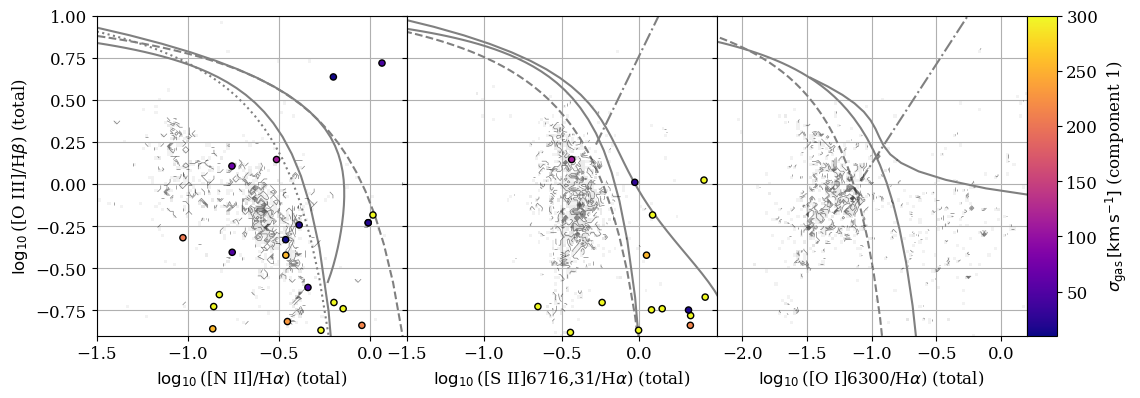

In [10]:
# Optical diagnostic (i.e. BPT) diagram
fig, axs, cax = plot_empty_BPT_diagram(colorbar=True, nrows=1, include_Law2021=True, figsize=(12, 4))
markers = ["o", ">", "D"]
col_z = "sigma_gas (component 1)"
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df,
                       col_x=f"{col_x} (total)",
                       col_y=f"log O3 (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=axs[cc], plot_colorbar=False)

    # Plot measurements for this galaxy
    plot2dscatter(df=df, gal=gal,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z=col_z,
                  cax=cax,
                  marker="o", ax=axs[cc], 
                  markersize=20, 
                  markeredgecolor="black",
                  plot_colorbar=True if cc == 2 else False)

# Decorations
[ax.grid() for ax in axs]
[ax.set_ylabel("") for ax in axs[1:]]
[ax.set_yticklabels([]) for ax in axs[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs[:-1]]
[ax.collections[0].set_rasterized(True) for ax in axs]
